In [1]:
import h5py as h5
import netCDF4 as nc
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import os
import time
import cv2
import csv
from global_land_mask import globe 
import glob
import math
from tqdm import tqdm
import re
import seaborn as sns


In [34]:
goci_sample = '/home/juneyonglee/gocirrs_backup/home/pmilab/Downloads/GK2B_GOCI2_L2_20210101_001530_LA_S006_Chl.nc'

f = h5.File(goci_sample,'r+')
a = f['HDFEOS']['GRIDS']['Image Data']['Data Fields']['CHL Image Pixel Values']
a = list(a)
np_a = np.array(a)
np_a = np.where(np_a==-999.0, 0, np_a)
dst = np_a

In [35]:
dst.shape

(5685, 5567)

In [37]:
np_a.shape

(8000, 10500)

In [45]:
goci2_sample = '/home/ubuntu/문서/AY_ust/chl_sample/goci2/GK2_GC2_L2_20210301_011530/GK2B_GOCI2_L2_20210301_011530_LA_S000_Chl.nc'
f = nc.Dataset(goci2_sample,'r')
a= f['geophysical_data']['Chl'][:].data
np_a = np.array(a)
np_a = np.where(np_a==-999.0, 0, np_a)
np_a.shape

(2780, 2780)

In [2]:
from scipy import io
mat_file = io.loadmat('/home/juneyonglee/Desktop/AY_ust/preprocessing/Land_mask/Land_mask.mat')
land_mask = mat_file['Land']

land_mask.shape

(8000, 10500)

In [7]:
import h5py

def check_with_h5py(file_path):
    try:
        with h5py.File(file_path, 'r') as f:
            print("File opened successfully with h5py.")
            # 파일 내부의 키(데이터셋 구조) 출력
            print("File keys: ", list(f.keys()))
            # 필요한 경우 첫 번째 데이터셋의 세부 정보 확인
            first_key = list(f.keys())[0]
            dataset = f[first_key]
            print(f"Dataset '{first_key}' shape: {dataset.shape}")
            print(f"Dataset '{first_key}' data type: {dataset.dtype}")
    except OSError as e:
        print(f"Failed to open file with h5py: {e}")

# h5py로 파일 열기 시도
file_path = '/home/juneyonglee/Downloads/AQUA_MODIS.20120101_20120108.L3m.8D.CHL.chlor_a.4km.nc'
check_with_h5py(file_path)


['chlor_a', 'eightbitcolor', 'lat', 'lon', 'palette', 'processing_control', 'rgb']
Shape of 'chlor_a': (4320, 8640)


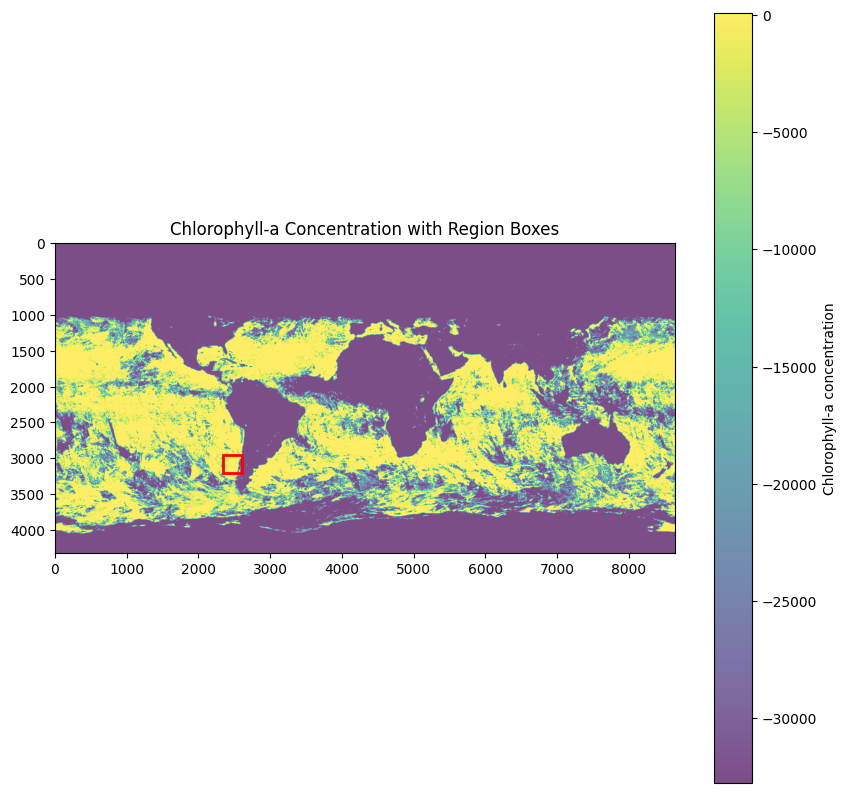

In [4]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# MODIS 파일 경로
file_path = '/home/juneyonglee/Downloads/AQUA_MODIS.20120101_20120108.L3m.8D.CHL.chlor_a.4km.nc'

# 낙동강 좌표 설정 (픽셀 좌표)
region1_x_min, region1_x_max = 2346, 2602
region1_y_min, region1_y_max = 2953, 3209
# # 새만금 좌표 설정 (픽셀 좌표)
# region2_x_min, region2_x_max = 1861, 2117
# region2_y_min, region2_y_max = 2659, 2915

# 대한민국 찾기 
region2_x_min, region2_x_max = 1250, 1450
region2_y_min, region2_y_max = 7500, 7700

def display_modis_chlor_a(file_path, region1_x_min, region1_x_max, region1_y_min, region1_y_max, 
                          region2_x_min, region2_x_max, region2_y_min, region2_y_max):
    # h5py로 파일 열기
    try:
        with h5py.File(file_path, 'r') as f:
            # chlor_a 데이터 읽기
            chlor_a_data = f['chlor_a'][:]
    except OSError as e:
        print(f"Failed to open file: {file_path}")
        return

    # 결측치를 처리 (보통 -999.0 값을 결측치로 가정)
    chlor_a_data = np.where(chlor_a_data == -999.0, np.nan, chlor_a_data)

    # 이미지 출력
    plt.figure(figsize=(10, 10))
    
    # chlor_a 데이터 이미지
    plt.imshow(chlor_a_data, cmap='viridis', alpha=0.7)
    plt.colorbar(label='Chlorophyll-a concentration')

    # 낙동강 영역에 빨간색 사각형 추가
    rect1 = Rectangle((region1_x_min, region1_y_min), region1_x_max - region1_x_min, region1_y_max - region1_y_min,
                     linewidth=2, edgecolor='r', facecolor='none')
    plt.gca().add_patch(rect1)

    # 새만금 영역에 빨간색 사각형 추가
    rect2 = Rectangle((region2_x_min, region2_y_min), region2_x_max - region2_x_min, region2_y_max - region2_y_min,
                     linewidth=2, edgecolor='r', facecolor='none')
    plt.gca().add_patch(rect2)

    plt.title('Chlorophyll-a Concentration with Region Boxes')
    plt.show()


# chlor_a 데이터와 새만금 및 낙동강 좌표 범위에 네모 박스 표시
display_modis_chlor_a(file_path, region1_x_min, region1_x_max, region1_y_min, region1_y_max, 
                      region2_x_min, region2_x_max, region2_y_min, region2_y_max)


File opened successfully with h5py.
File keys:  ['chlor_a', 'eightbitcolor', 'lat', 'lon', 'palette', 'processing_control', 'rgb']
Dataset 'chlor_a' shape: (4320, 8640)
Dataset 'chlor_a' data type: float32


/tmp/ipykernel_4069574/3647047339.py:48: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("jet").copy()


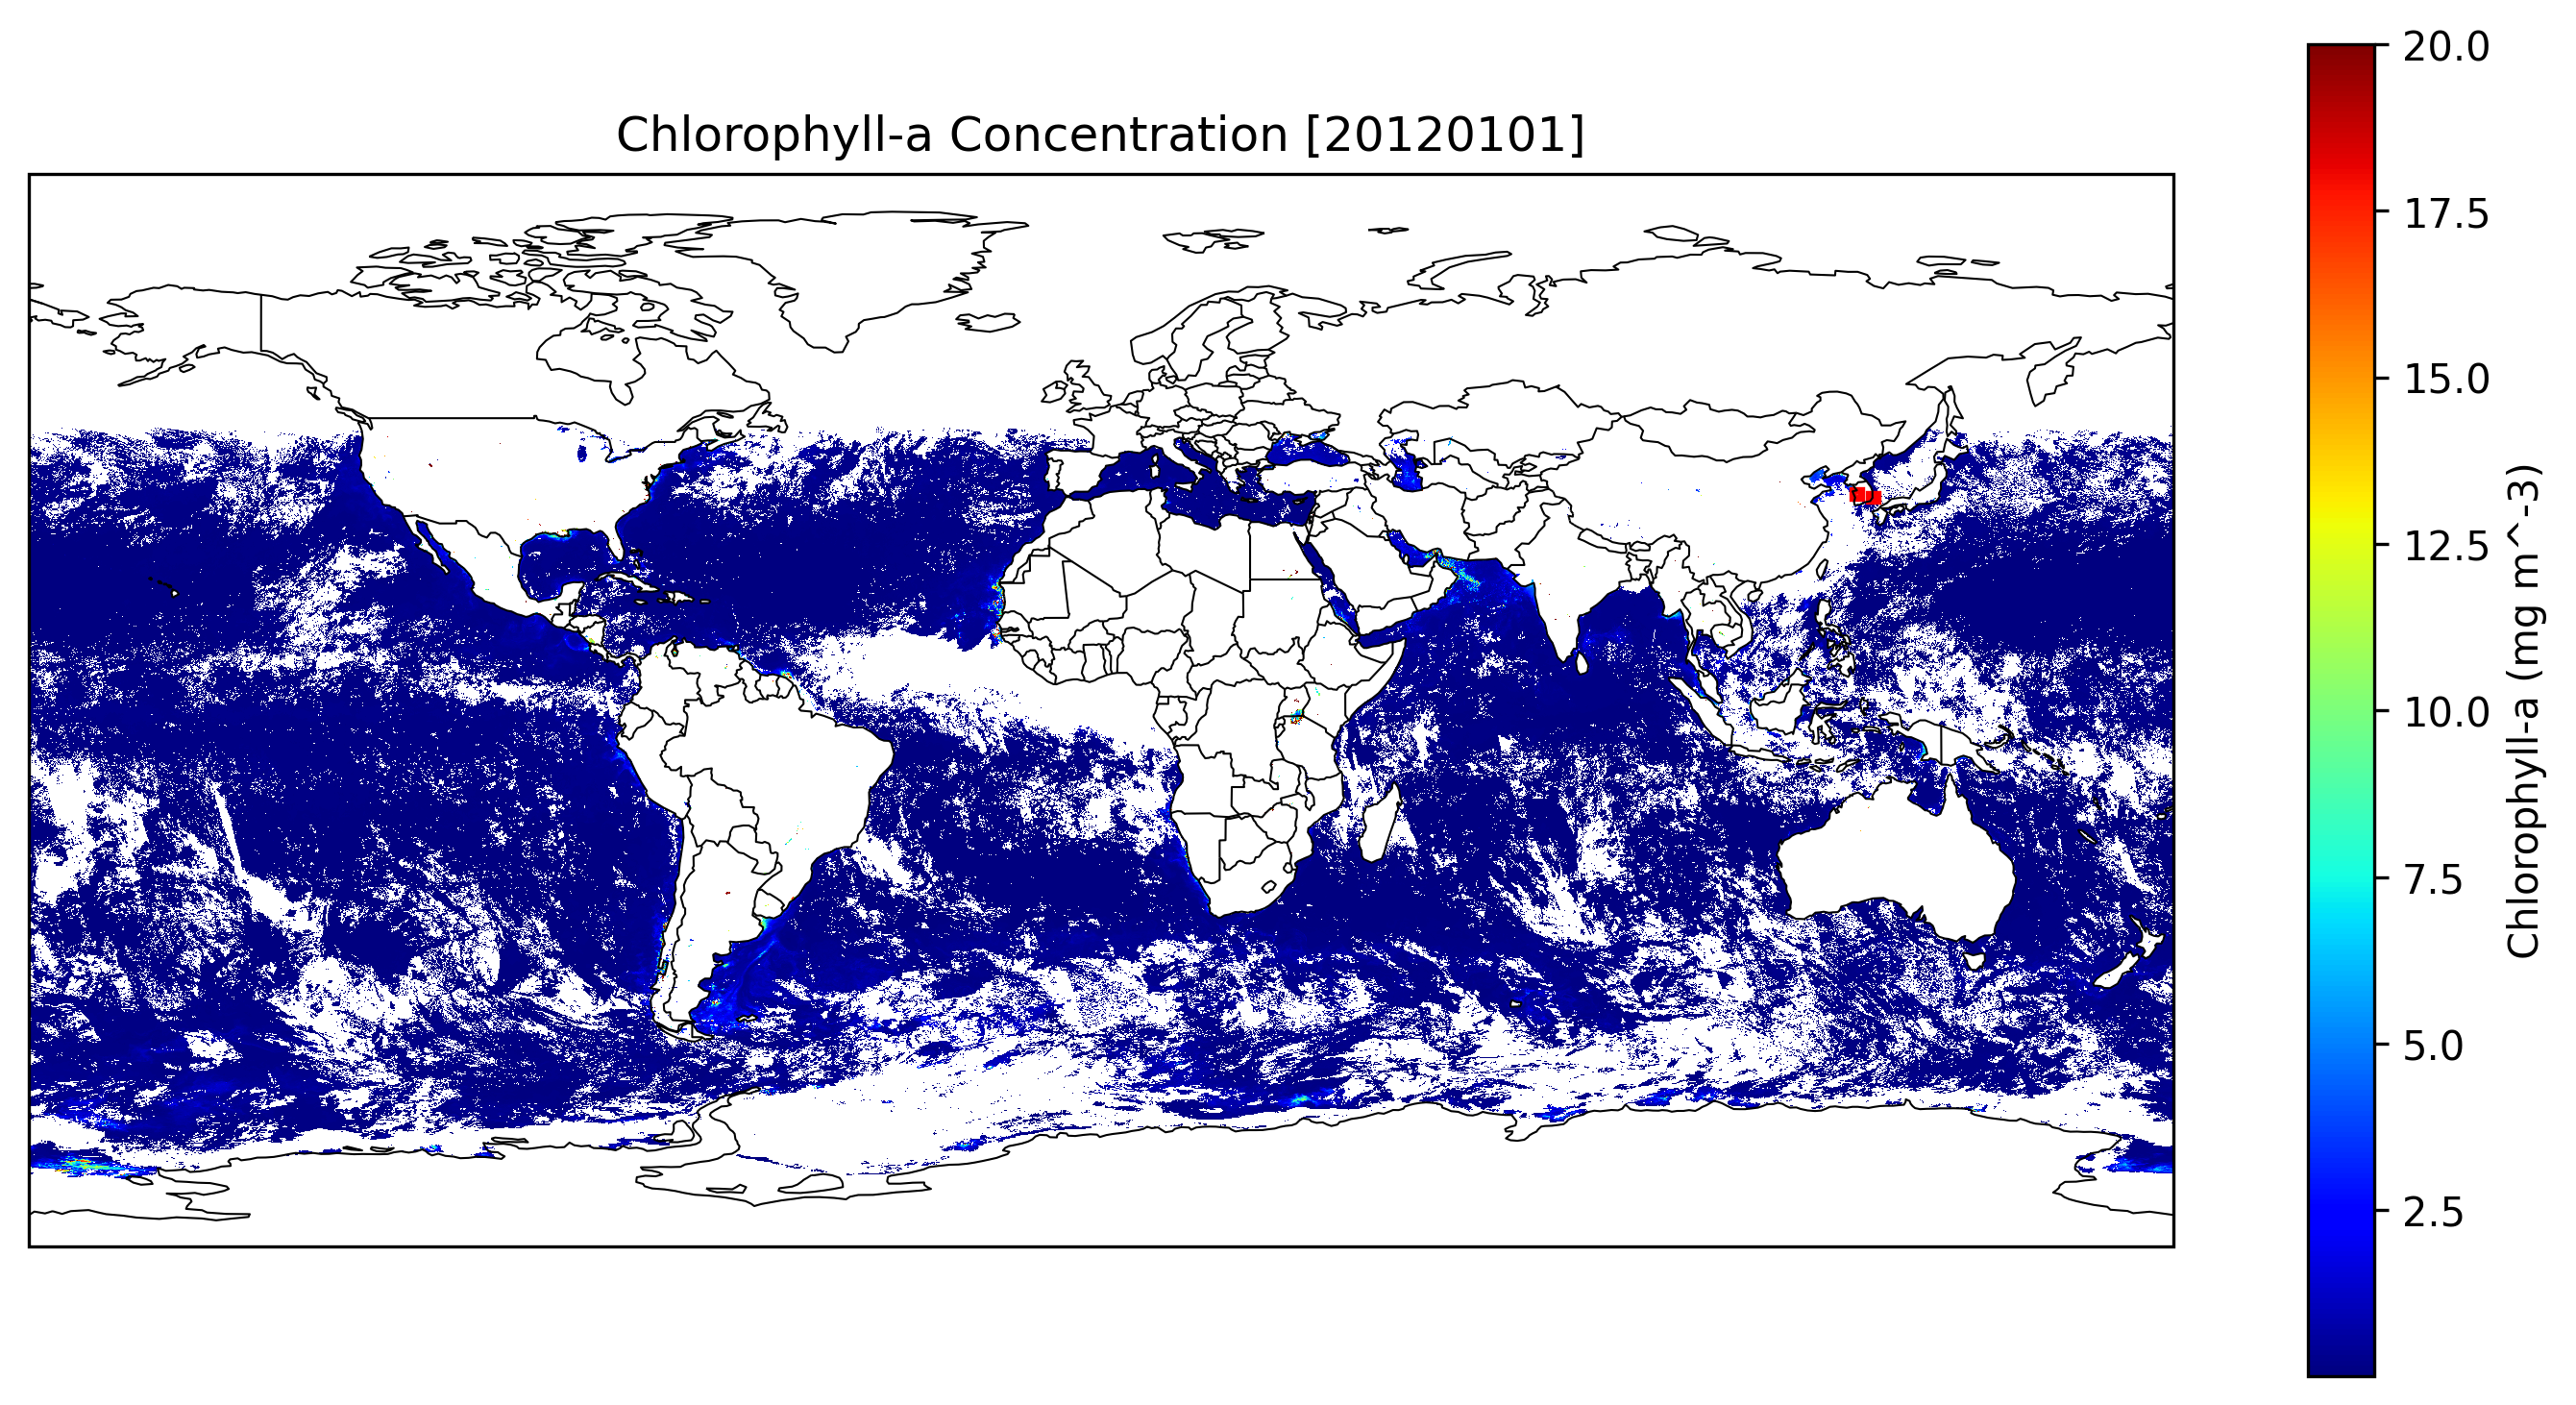

/tmp/ipykernel_4069574/3647047339.py:83: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("jet").copy()


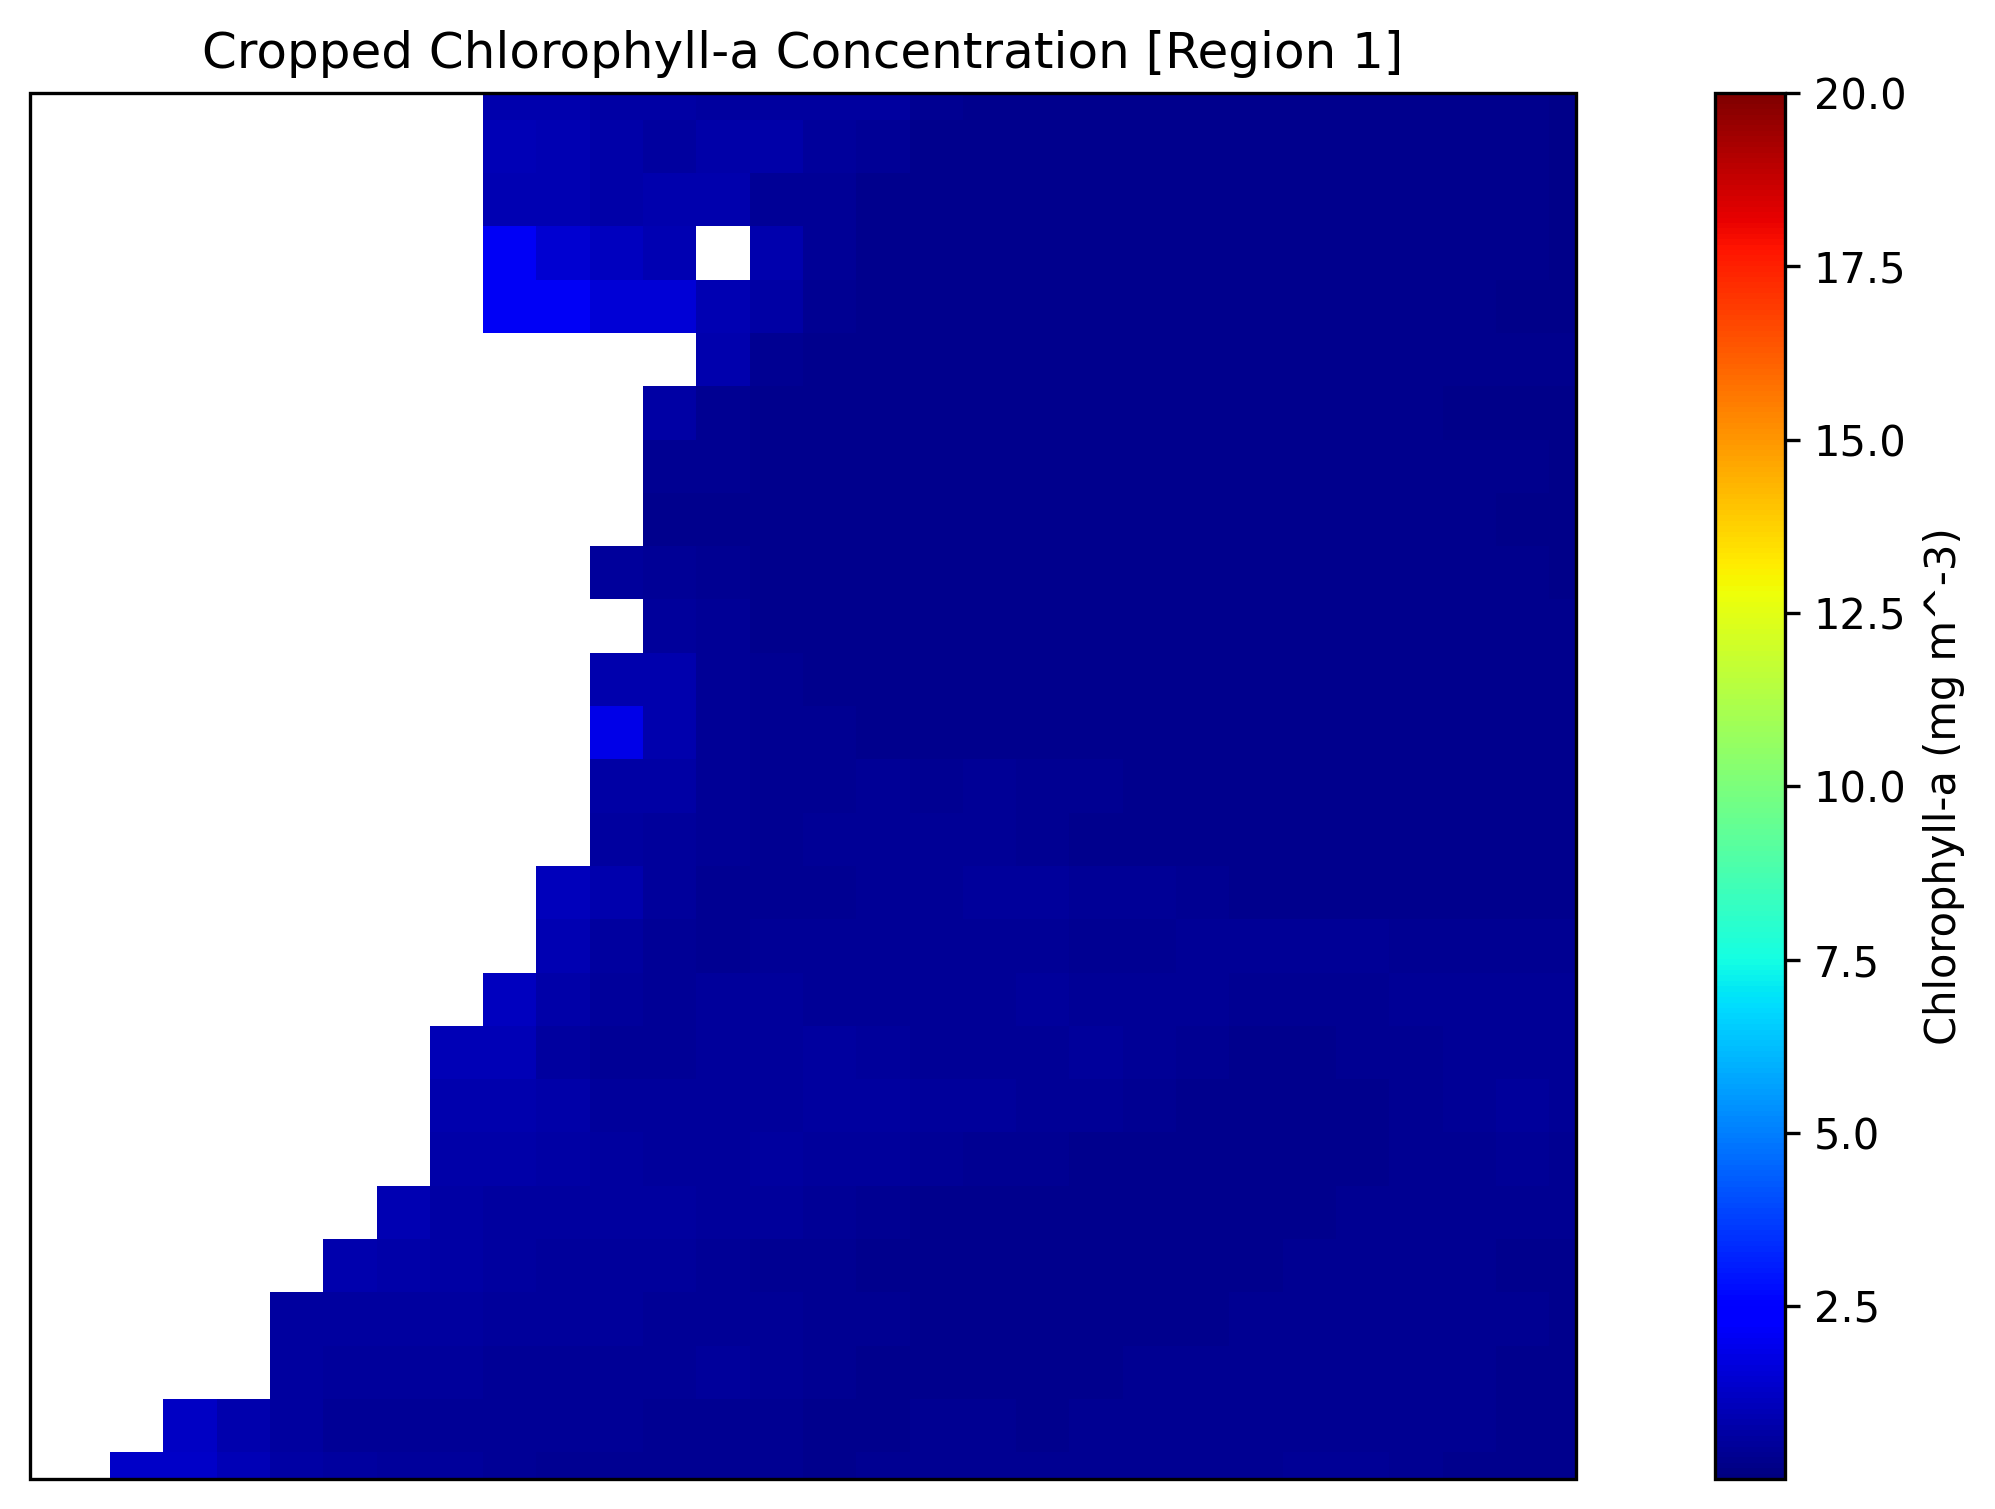

/tmp/ipykernel_4069574/3647047339.py:83: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("jet").copy()


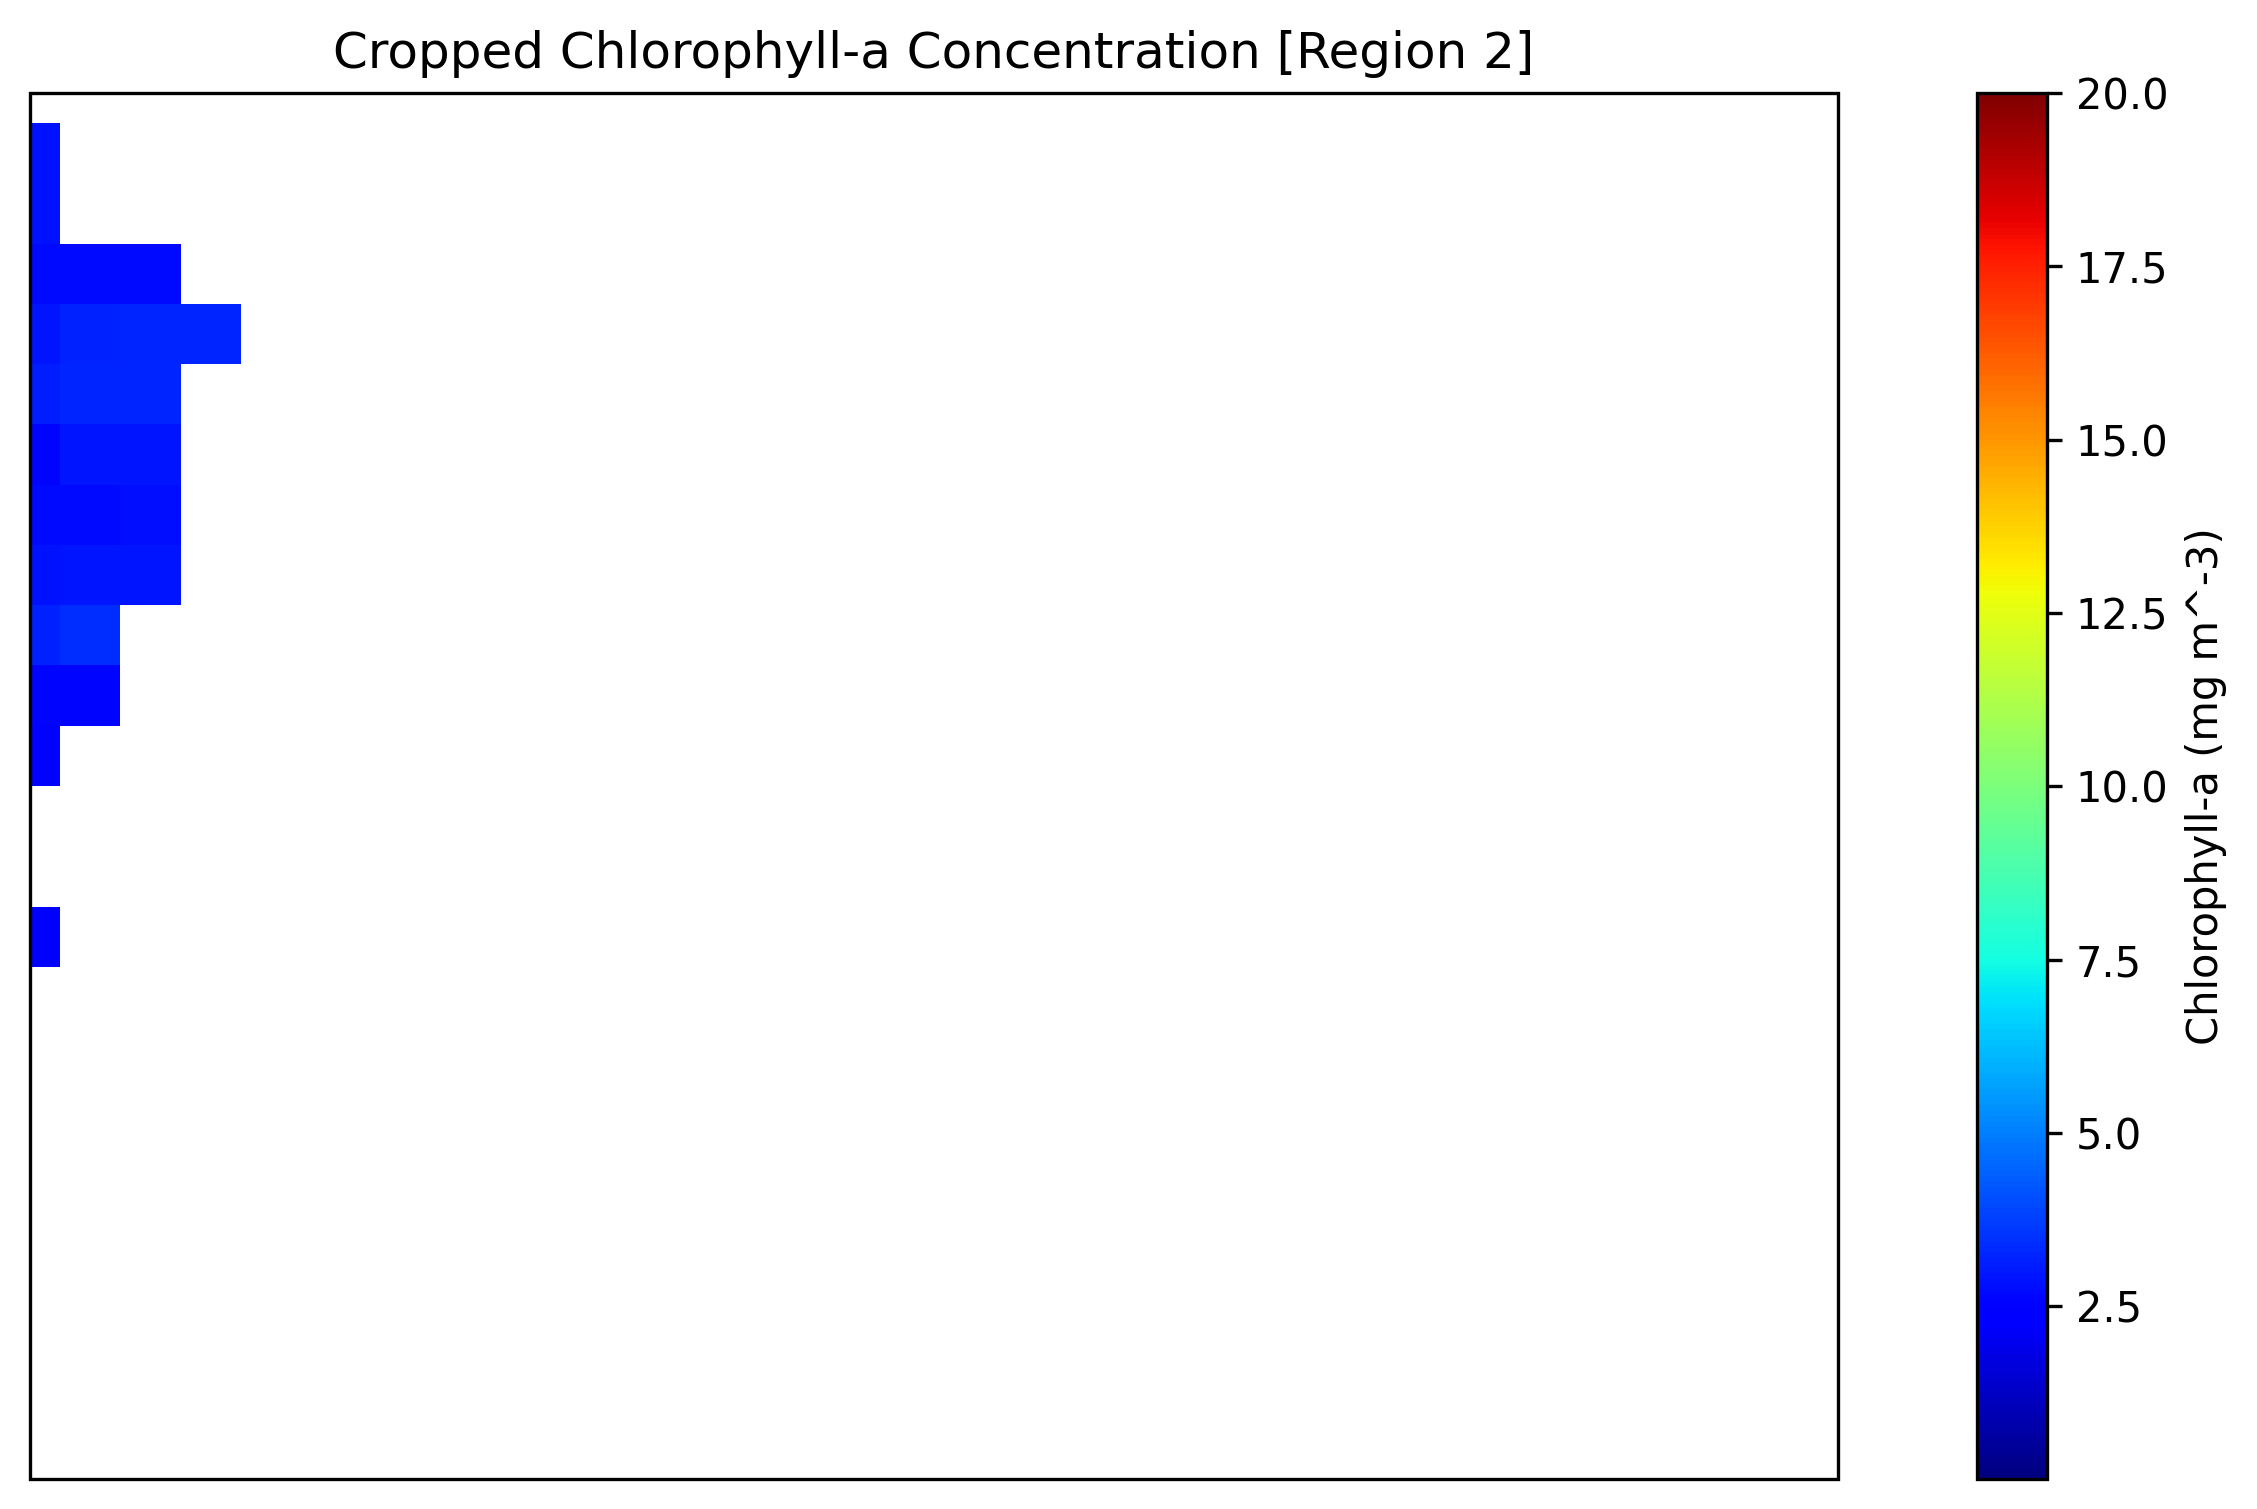

In [14]:
import os
import numpy as np
import pandas as pd
from netCDF4 import Dataset
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle
import cartopy.crs as ccrs
import cartopy.feature as cfeature

def load_data(nc_file):
    """Load chlorophyll-a data from a NetCDF file."""
    with Dataset(nc_file, 'r') as nc:
        lat = nc.variables['lat'][:]
        lon = nc.variables['lon'][:]
        chlor_a = nc.variables['chlor_a'][:]
    return lat, lon, chlor_a

def crop_region(lat, lon, data, region):
    """Crop the data to the given region."""
    lat_min, lat_max = region['lat_min'], region['lat_max']
    lon_min, lon_max = region['lon_min'], region['lon_max']
    
    # Find the indices that match the region's latitude and longitude limits
    lat_inds = np.where((lat >= lat_min) & (lat <= lat_max))[0]
    lon_inds = np.where((lon >= lon_min) & (lon <= lon_max))[0]
    
    # Crop the data, latitude, and longitude based on the found indices
    lat_cropped = lat[lat_inds]
    lon_cropped = lon[lon_inds]
    data_cropped = data[np.ix_(lat_inds, lon_inds)]
    
    return lat_cropped, lon_cropped, data_cropped

def draw_map(lat, lon, data, output_file, idate, regions):
    """Draws the chlorophyll-a concentration data on a map and saves it as a PNG file."""
    fig = plt.figure(figsize=(12, 6), dpi=300)
    ax = plt.axes(projection=ccrs.PlateCarree())

    # Define the extent of the map
    ax.set_extent([np.min(lon), np.max(lon), np.min(lat), np.max(lat)], crs=ccrs.PlateCarree())

    # Add natural features (coastlines, borders, land)
    ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
    ax.add_feature(cfeature.BORDERS, linewidth=0.5)
    ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='lightgray')

    # Set colormap and plot chlorophyll-a concentration data
    cmap = plt.cm.get_cmap("jet").copy()
    cmap.set_bad('white', 1.0)
    
    # Plotting chlorophyll-a concentration
    plt.pcolormesh(lon, lat, data, cmap=cmap, vmin=0.01, vmax=20, shading='auto', transform=ccrs.PlateCarree())

    # Add colorbar
    cbar = plt.colorbar(orientation='vertical', pad=0.05)
    cbar.set_label('Chlorophyll-a (mg m^-3)')
    
    # Set title
    plt.title(f'Chlorophyll-a Concentration [{idate.strftime("%Y%m%d")}]')

    # Draw rectangles for regions (list of dictionaries containing region coordinates)
    for region in regions:
        x_min, x_max = region['lon_min'], region['lon_max']
        y_min, y_max = region['lat_min'], region['lat_max']
        rect = Rectangle((x_min, y_min), x_max - x_min, y_max - y_min, 
                         linewidth=2, edgecolor='red', facecolor='none', transform=ccrs.PlateCarree())
        ax.add_patch(rect)

    # Save the figure to a file
    plt.savefig(output_file, bbox_inches='tight')
    plt.show()
    plt.close(fig)

def draw_cropped_map(lat, lon, data, region, output_file, idate):
    """Draws a cropped map of the given region and saves it as a PNG file."""
    fig = plt.figure(figsize=(12, 6), dpi=300)
    ax = plt.axes(projection=ccrs.PlateCarree())

    # Define the extent of the cropped map
    ax.set_extent([np.min(lon), np.max(lon), np.min(lat), np.max(lat)], crs=ccrs.PlateCarree())

    # Set colormap and plot chlorophyll-a concentration data
    cmap = plt.cm.get_cmap("jet").copy()
    cmap.set_bad('white', 1.0)
    
    # Plotting chlorophyll-a concentration in the cropped region
    plt.pcolormesh(lon, lat, data, cmap=cmap, vmin=0.01, vmax=20, shading='auto', transform=ccrs.PlateCarree())

    # Add colorbar
    cbar = plt.colorbar(orientation='vertical', pad=0.05)
    cbar.set_label('Chlorophyll-a (mg m^-3)')
    
    # Set title
    plt.title(f'Cropped Chlorophyll-a Concentration [{region["name"]}]')

    # Save the figure to a file
    plt.savefig(output_file, bbox_inches='tight')
    plt.show()
    plt.close(fig)

def main(file_path, idate):
    # Output directory 설정
    odir = f"output/fig/{idate.year}/{idate.month:02d}"
    os.makedirs(odir, exist_ok=True)
    output_file = f'{odir}/{idate.strftime("%Y%m%d")}.png'  # Output image file name

    # 특정 영역을 설정 (좌표는 lon_min, lon_max, lat_min, lat_max 형식으로 제공)
    regions = [
        {'name': 'Region 1', 'lon_min': 129, 'lon_max': 130.25, 'lat_min': 35.1, 'lat_max': 36.2},  # 예시 좌표
        {'name': 'Region 2', 'lon_min': 126.20, 'lon_max': 127.50, 'lat_min': 35.70, 'lat_max': 36.70}   # 예시 좌표
    ]

    # 데이터 로드 및 전체 지도 출력
    lat, lon, chlor_a = load_data(file_path)
    draw_map(lat, lon, chlor_a, output_file, idate, regions)

    # 각 영역을 크롭한 후 별도로 저장
    for region in regions:
        lat_cropped, lon_cropped, chlor_a_cropped = crop_region(lat, lon, chlor_a, region)
        cropped_output_file = f'{odir}/{idate.strftime("%Y%m%d")}_{region["name"].replace(" ", "_")}_cropped.png'
        draw_cropped_map(lat_cropped, lon_cropped, chlor_a_cropped, region, cropped_output_file, idate)

if __name__ == "__main__":
    # 실제 사용하는 NetCDF 파일 경로
    file_path = '/home/juneyonglee/Downloads/AQUA_MODIS.20120101_20120108.L3m.8D.CHL.chlor_a.4km.nc'
    
    # 날짜 설정 (이미지에 날짜 표시를 위한 예시)
    idate = pd.to_datetime('2012-01-01')
    
    # main 함수 실행
    main(file_path, idate)
